In [26]:
import projetannuel

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Classification Linéaire

In [28]:
data = load_iris()

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [30]:
print(Y_train)

[1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]


In [31]:
Y_train = projetannuel.float_labels(Y_train)

In [32]:
model = projetannuel.LinearModel(
    X_train,
    Y_train,
)

model

In [33]:
model.train_classification(100_000, 0.001, algo = "gradient-descent")

In [34]:
Y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [35]:
Y_pred = []

for v in X_test:
    pred = model.predict(v)
    # print(pred)
    # pred_proba = model.predict_proba(v)
    Y_pred.append(pred)
# print(pred_proba)
print(Y_pred)

[1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.0, 0.0]


In [36]:
projetannuel.accuracy_score(Y_pred, Y_test.tolist())

1.0

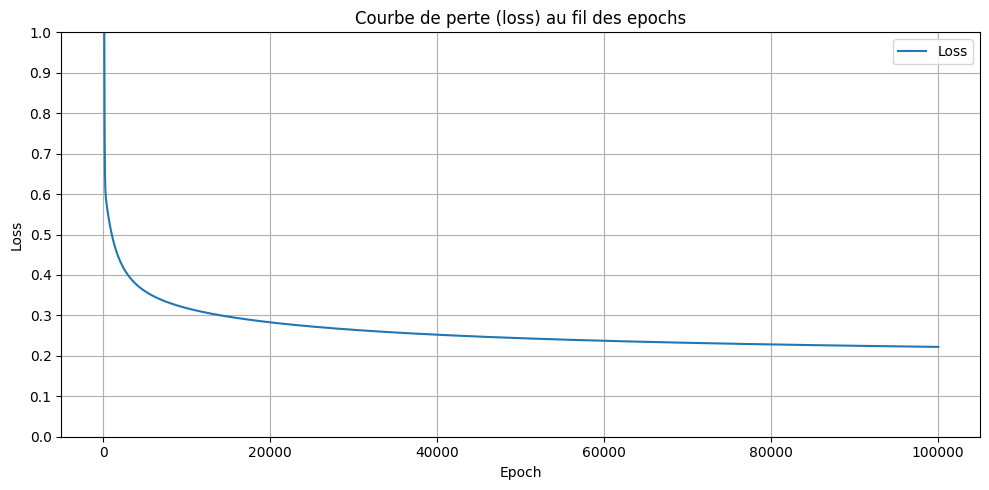

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()